In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [44]:
df = pd.read_csv('..\data\hcpcs_apc.csv', dtype='str')

In [45]:
apc_5302_hcpcs =df[df['APC']== '5302']
apc_5302_hcpcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1875 to 5170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hcpcs_code  59 non-null     object
 1   APC         59 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [46]:
#find unique hcpcs code for APC 5302
uni_hcpcs_apc5302 = apc_5302_hcpcs['hcpcs_code'].unique()
uni_hcpcs_apc5302.shape

(59,)

In [47]:
# only this combination of entity type "O" and place of service "F" has provider type "Ambulatory Surgical Center"
#provider_ASC.csv is for entity type "O", place of service "F", and provider type "Ambulatory Surgical Center"
provider_ASC = pd.read_csv('..\data\provider_ASC.csv', dtype={'npi':'str', 'ZIP':'str','HCPCS':'category'})
provider_ASC.head()

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP
0,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,0191T,Internal insertion of eye fluid drainage device,11,13,3042.237692,2385.113846,95687
1,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,20610,Aspiration and/or injection of large joint or ...,14,15,26.260000,20.588947,95687
2,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,29823,Extensive removal of shoulder joint tissue usi...,15,15,837.130000,656.310000,95687
3,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,29824,Partial removal of collar bone at shoulder usi...,14,14,1016.512857,796.945714,95687
4,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,29827,Repair of shoulder rotator cuff using an endos...,22,22,3391.399545,2652.337273,95687


In [48]:
unique_hcpcs_list_apc_5302 =['32556', '43191', '43192', '43193', '43194', '43201', '43202',
       '43204', '43205', '43206', '43211', '43213', '43214', '43215',
       '43216', '43217', '43220', '43226', '43227', '43231', '43232',
       '43233', '43237', '43238', '43241', '43242', '43243', '43244',
       '43245', '43246', '43249', '43250', '43251', '43253', '43254',
       '43255', '43259', '43270', '43453', '43830', '44360', '44361',
       '44363', '44364', '44365', '44366', '44369', '44372', '44373',
       '44376', '44377', '44378', '44381', '49423', '49436', '49440',
       '49441', '49446', '0355T']

In [49]:
#Providers with all hcpcs code that have correspondent APC- 5302
provider_ASC_5302 =provider_ASC[provider_ASC.HCPCS.isin(unique_hcpcs_list_apc_5302)]

In [50]:
provider_ASC_5302.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 9 to 57276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   npi                   1187 non-null   object  
 1   np_last_orgname       1187 non-null   object  
 2   np_entity_code        1187 non-null   object  
 3   np_city               1187 non-null   object  
 4   np_state              1187 non-null   object  
 5   p_type                1187 non-null   object  
 6   place_of_service      1187 non-null   object  
 7   HCPCS                 1187 non-null   category
 8   hcpcs_description     1187 non-null   object  
 9   unique_beneficiary    1187 non-null   int64   
 10  bene_day_srvc_cnt     1187 non-null   int64   
 11  avg_medicare_allowed  1187 non-null   float64 
 12  avg_medicare_pymt     1187 non-null   float64 
 13  ZIP                   1187 non-null   object  
dtypes: category(1), float64(2), int64(2), object(9)
memory 

In [51]:
provider_ASC_5302[provider_ASC_5302['HCPCS'] =='43249'].shape

(616, 14)

In [52]:
provider_hcpcs_43249=provider_ASC_5302[provider_ASC_5302['HCPCS'] =='43249']

In [53]:
provider_hcpcs_43249.head(n=10)

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP
9,1003015843,"NORTHBAY PHYSICIAN'S SURGERY CENTER, L.L.C.",O,VACAVILLE,CA,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,16,20,814.534500,596.400500,95687
76,1003079187,WASC LLC,O,WOOSTER,OH,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,15,17,555.310000,433.162941,44691
221,1003220187,"CENTRAL OHIO ENDOSCOPY CENTER, LLC",O,COLUMBUS,OH,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,79,94,596.510000,463.132234,43202
325,1003815242,"DOTHAN SURGERY CENTER, LLC",O,DOTHAN,AL,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,409,446,509.857780,391.675538,36301
502,1003887225,CENTRAL TEXAS ENDOSCOPY CENTER LLC,O,BRYAN,TX,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,23,26,576.830000,445.692692,77802
514,1003887845,"AUSTIN ENDOSCOPY CENTER II, LP",O,AUSTIN,TX,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,21,24,598.640000,469.330000,78745
525,1003888595,"LOUISVILLE ENDOSCOPY CENTER, PLLC",O,LOUISVILLE,KY,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,76,86,573.810000,442.603721,40217
534,1003888710,DIGESTIVE ENDOSCOPY CENTER LLC,O,KETTERING,OH,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,131,138,574.605797,442.073116,45429
548,1003889346,ENDOSCOPY GROUP LLC,O,PENSACOLA,FL,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,19,19,545.090000,419.798947,32503
658,1013011162,BAY AREA ENDOSCOPY CENTER LIMITED PARTNERSHIP,O,ST PETERSBURG,FL,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,11,13,579.440000,454.143846,33709


In [54]:
provider_ASC_5302.to_csv('provider_ASC_5302.csv', index=False)

In [55]:
CBSA_ZIP_list =['37010', '37011', '37012', '37013', '37014', '37015', '37016',
       '37018', '37020', '37022', '37024', '37025', '37026', '37027',
       '37029', '37030', '37031', '37032', '37035', '37036', '37037',
       '37043', '37046', '37048', '37049', '37051', '37052', '37055',
       '37056', '37057', '37060', '37062', '37063', '37064', '37065',
       '37066', '37067', '37068', '37069', '37070', '37071', '37072',
       '37073', '37074', '37075', '37076', '37077', '37080', '37082',
       '37083', '37085', '37086', '37087', '37088', '37089', '37090',
       '37091', '37095', '37101', '37110', '37115', '37116', '37118',
       '37119', '37121', '37122', '37127', '37128', '37129', '37130',
       '37131', '37132', '37133', '37135', '37138', '37141', '37143',
       '37145', '37146', '37148', '37149', '37150', '37151', '37152',
       '37153', '37160', '37165', '37166', '37167', '37171', '37172',
       '37174', '37179', '37180', '37181', '37184', '37186', '37187',
       '37188', '37189', '37190', '37201', '37202', '37203', '37204',
       '37205', '37206', '37207', '37208', '37209', '37210', '37211',
       '37212', '37213', '37214', '37215', '37216', '37217', '37218',
       '37219', '37220', '37221', '37222', '37224', '37227', '37228',
       '37229', '37232', '37234', '37235', '37236', '37238', '37240',
       '37242', '37243', '37246', '37250', '37357', '38401', '38402',
       '38451', '38454', '38461', '38472', '38474', '38476', '38482',
       '38483', '38487', '38547', '38548', '38552', '38560', '38563',
       '38567', '38569', '38588']

In [56]:
provider_43249 = provider_hcpcs_43249[provider_hcpcs_43249.ZIP.isin(CBSA_ZIP_list)]

In [57]:
#records of non-hospital provider payment for hcpcs code: 43249;"Balloon dilation of esophagus using an endoscope"
provider_43249

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP
7943,1124498357,ENDOSCOPY CENTER OF INLAND EMPIRE LLC,O,NASHVILLE,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,16,16,660.990000,512.294375,37219
12767,1225039761,ENDOSCOPY CENTER OF ST THOMAS LP,O,NASHVILLE,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,16,17,565.636471,435.024706,37205
16881,1295708964,COLUMBIA TN ENDOSCOPY ASC LLC,O,COLUMBIA,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,29,34,587.110000,454.431471,38401
25382,1427152073,PATIENT PARTNERS LLC,O,GALLATIN,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,23,23,587.110000,456.564783,37066
37201,1639299803,MURFREESBORO MEDICAL CLINIC P A,O,MURFREESBORO,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,32,33,587.110000,433.111515,37129


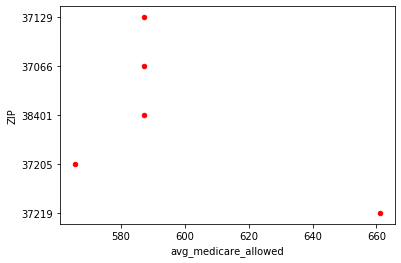

In [58]:
#amount Non-hospital paid in Nashville city, ASC 5302 & hcpcs 43249
ax= provider_43249.plot.scatter(x='avg_medicare_allowed',y='ZIP',c='red')

In [59]:
#records of Nashville non-hospital provider payments for ASC 5302 (hcpcs: 43249, 43251, 43246)
provider_nash_5302=provider_ASC_5302[provider_ASC_5302.ZIP.isin(CBSA_ZIP_list)]
provider_nash_5302

,npi,np_last_orgname,np_entity_code,np_city,np_state,p_type,place_of_service,HCPCS,hcpcs_description,unique_beneficiary,bene_day_srvc_cnt,avg_medicare_allowed,avg_medicare_pymt,ZIP
7943,1124498357,ENDOSCOPY CENTER OF INLAND EMPIRE LLC,O,NASHVILLE,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,16,16,660.990000,512.294375,37219
12767,1225039761,ENDOSCOPY CENTER OF ST THOMAS LP,O,NASHVILLE,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,16,17,565.636471,435.024706,37205
12768,1225039761,ENDOSCOPY CENTER OF ST THOMAS LP,O,NASHVILLE,TN,Ambulatory Surgical Center,F,43251,"Removal of polyps or growths of esophagus, sto...",14,14,587.110000,425.971429,37205
13757,1235376104,"GASTROENTEROLOGY & SURGERY CENTER OF ARKANSAS,...",O,NASHVILLE,TN,Ambulatory Surgical Center,F,43246,Insertion of stomach tube using an endoscope,12,17,550.540000,431.620000,37219
13758,1235376104,"GASTROENTEROLOGY & SURGERY CENTER OF ARKANSAS,...",O,NASHVILLE,TN,Ambulatory Surgical Center,F,43251,"Removal of polyps or growths of esophagus, sto...",19,21,537.431905,421.343810,37219
16881,1295708964,COLUMBIA TN ENDOSCOPY ASC LLC,O,COLUMBIA,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,29,34,587.110000,454.431471,38401
25382,1427152073,PATIENT PARTNERS LLC,O,GALLATIN,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,23,23,587.110000,456.564783,37066
37201,1639299803,MURFREESBORO MEDICAL CLINIC P A,O,MURFREESBORO,TN,Ambulatory Surgical Center,F,43249,Balloon dilation of esophagus using an endoscope,32,33,587.110000,433.111515,37129


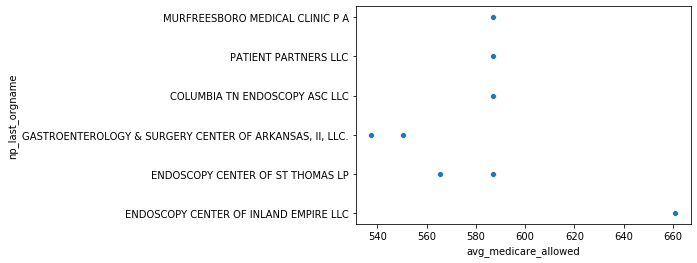

In [60]:
#Nearby non-hospital paid amount for Nashville city, ASC 5302 
ax = sns.scatterplot(x="avg_medicare_allowed", y="np_last_orgname", data= provider_nash_5302, legend="full", sizes=(50, 200)) #hue="ZIP",

###### Find max, min, average medicare payment for non-hospital in nashville, CBSA = 34980

In [61]:
provider_nash_5302.groupby('hcpcs_description').avg_medicare_allowed.agg(['count','max','mean','min'])

,count,max,mean,min
hcpcs_description,,,,
Balloon dilation of esophagus using an endoscope,5,660.99,597.591294,565.636471
Insertion of stomach tube using an endoscope,1,550.54,550.540000,550.540000
"Removal of polyps or growths of esophagus, stomach, and/or upper small bowel using an endoscope",2,587.11,562.270952,537.431905
